In [2]:
import sys
import numpy as np
import cv2
from PIL import Image

In [7]:
mask = cv2.imread('E:/dataset/foot_ball_segmenatation/masks/1.png', cv2.COLOR_BGR2HSV)
mask

array([[[ 45, 182, 143],
        [ 45, 182, 143],
        [ 45, 182, 143],
        ...,
        [ 45, 182, 143],
        [ 45, 182, 143],
        [ 45, 182, 143]],

       [[ 45, 182, 143],
        [ 45, 182, 143],
        [ 45, 182, 143],
        ...,
        [ 45, 182, 143],
        [ 45, 182, 143],
        [ 45, 182, 143]],

       [[ 45, 182, 143],
        [ 45, 182, 143],
        [ 45, 182, 143],
        ...,
        [ 45, 182, 143],
        [ 45, 182, 143],
        [ 45, 182, 143]],

       ...,

       [[ 74, 158, 201],
        [ 74, 158, 201],
        [ 74, 158, 201],
        ...,
        [ 74, 158, 201],
        [ 74, 158, 201],
        [ 74, 158, 201]],

       [[ 74, 158, 201],
        [ 74, 158, 201],
        [ 74, 158, 201],
        ...,
        [ 74, 158, 201],
        [ 74, 158, 201],
        [ 74, 158, 201]],

       [[ 74, 158, 201],
        [ 74, 158, 201],
        [ 74, 158, 201],
        ...,
        [ 74, 158, 201],
        [ 74, 158, 201],
        [ 74, 158, 201]]

In [12]:
import cv2
import numpy as np

# 글로벌 변수
selected_point = None  # 선택된 좌표 (Contour 인덱스, 점 인덱스)
radius = 5  # 점 선택 반경
epsilon_ratio = 0.02  # 근사화 정도 (윤곽선 길이에 비례)
window_name = "Polygon Editor"

# 마우스 콜백 함수
def mouse_callback(event, x, y, flags, param):
    global selected_point

    if event == cv2.EVENT_LBUTTONDOWN:  # 마우스 좌클릭
        # 클릭한 점이 Contour의 점 안에 있는지 확인
        for contour_idx, contour in enumerate(approx_contours):
            for point_idx, point in enumerate(contour):
                px, py = point[0]
                if (x - px) ** 2 + (y - py) ** 2 <= radius ** 2:  # 반경 내 클릭 확인
                    selected_point = (contour_idx, point_idx)
                    print(f"Selected Point: {px, py}")
                    return

    elif event == cv2.EVENT_MOUSEMOVE and selected_point:  # 드래그 중
        contour_idx, point_idx = selected_point
        approx_contours[contour_idx][point_idx] = [[x, y]]  # 좌표 업데이트
        print(f"Updated Point: {x, y}")

    elif event == cv2.EVENT_LBUTTONUP:  # 마우스 버튼을 뗌
        selected_point = None  # 선택 해제

lower_red = np.array([74,158,201])  # 빨간색의 정확한 값
upper_red = np.array([74,158,201])  # 빨간색의 정확한 값
red_mask = cv2.inRange(mask, lower_red, upper_red)  # 빨간색 영역만 마스크로 추출

# 결과 시각화 (빨간색 영역만 유지)
red_only = cv2.bitwise_and(mask, mask, mask=red_mask)

# 외곽선 찾기
contours, hierarchy = cv2.findContours(
    red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)

# 근사화된 Contour 생성
approx_contours = []
for contour in contours:
    epsilon = epsilon_ratio * cv2.arcLength(contour, True)  # 근사화 정도 계산
    approx = cv2.approxPolyDP(contour, epsilon, True)  # 근사화 수행
    approx_contours.append(approx)

# OpenCV 창 설정
cv2.namedWindow(window_name)
cv2.setMouseCallback(window_name, mouse_callback)

while True:
    # 폴리곤 그리기
    editable_image = mask.copy()  # 매 프레임마다 원본 이미지 복사
    for approx in approx_contours:
        cv2.polylines(editable_image, [approx], isClosed=True, color=(0, 255, 0), thickness=2)  # 업데이트된 Contour 반영
        for point in approx:
            px, py = point[0]
            cv2.circle(editable_image, (px, py), radius, (255, 0, 0), -1)  # 점 표시

    # 화면 업데이트
    cv2.imshow(window_name, editable_image)

    # 키보드 입력 처리
    key = cv2.waitKey(1)
    if key == 27:  # ESC 키를 누르면 종료
        break
    elif key == ord("s"):  # 's' 키를 눌러 저장
        # 투명한 배경 생성 (RGBA)
        height, width = mask.shape[:2]
        transparent_image = np.zeros((height, width, 3), dtype=np.uint8)
        
        # 폴리곤 그리기
        for approx in approx_contours:
            cv2.polylines(transparent_image, [approx], isClosed=True, color=(0, 255, 0), thickness=0)
        
        # 저장
        cv2.imwrite("modified_polygons.png", transparent_image)
        print("Polygons saved as 'modified_polygons.png'!")

cv2.destroyAllWindows()


Selected Point: (np.int32(296), np.int32(131))
Updated Point: (299, 137)
Updated Point: (300, 142)
Updated Point: (302, 147)
Updated Point: (304, 154)
Updated Point: (307, 161)
Updated Point: (307, 165)
Updated Point: (308, 167)
Updated Point: (309, 170)
Updated Point: (310, 171)
Updated Point: (311, 174)
Updated Point: (311, 177)
Updated Point: (311, 178)
Updated Point: (312, 180)
Updated Point: (312, 181)
Updated Point: (313, 182)
Updated Point: (314, 184)
Updated Point: (314, 186)
Updated Point: (315, 186)
Updated Point: (315, 188)
Updated Point: (315, 190)
Updated Point: (315, 190)
Updated Point: (316, 193)
Updated Point: (317, 195)
Updated Point: (317, 197)
Updated Point: (318, 199)
Updated Point: (319, 201)
Updated Point: (319, 202)
Updated Point: (319, 204)
Updated Point: (320, 205)
Updated Point: (321, 208)
Updated Point: (323, 210)
Updated Point: (323, 212)
Updated Point: (323, 215)
Updated Point: (324, 215)
Updated Point: (324, 218)
Updated Point: (325, 219)
Updated Point: (3

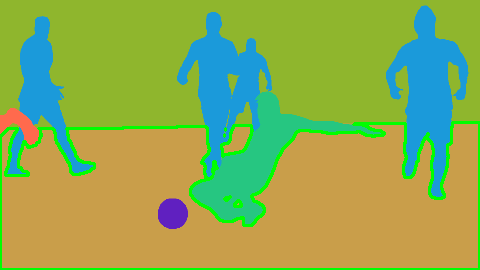

In [26]:
 빨간색(BGR: [0, 0, 255]) 추출
lower_red = np.array([74,158,201])  # 빨간색의 정확한 값
upper_red = np.array([74,158,201])  # 빨간색의 정확한 값
red_mask = cv2.inRange(mask, lower_red, upper_red)  # 빨간색 영역만 마스크로 추출

# 결과 시각화 (빨간색 영역만 유지)
red_only = cv2.bitwise_and(mask, mask, mask=red_mask)

# 외곽선 찾기
contours, hierarchy = cv2.findContours(
    red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)

polygon_mask = mask.copy()
for contour in contours:
    # 정확한 다각형 경계 좌표
    print("Exact Polygon Points:", contour.reshape(-1, 2))  # 모든 좌표 출력

    # 다각형 그리기
    cv2.polylines(polygon_mask, [contour], isClosed=True, color=(0, 255, 0), thickness=2)


red_only_rgb = cv2.cvtColor(polygon_mask, cv2.COLOR_BGR2RGB)
red_only_pil = Image.fromarray(red_only_rgb)

# Pillow로 이미지 시각화
red_only_pil